In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [24]:
df = pd.read_csv("/Users/rohanshenoy/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory data analysis

<Axes: xlabel='Attrition', ylabel='count'>

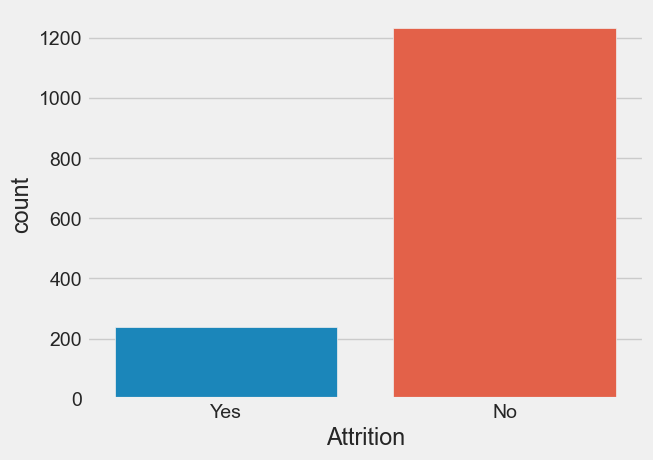

In [25]:
sns.countplot(x='Attrition', data=df)


# dropping columns, identifying categorical columns and encoding the target variable

In [26]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
#employeecount,over18 and standardhours

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes #encoding the target as 0,1

In [27]:
categorical_col.remove('Attrition')


In [28]:
#labelencoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Decision tree classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

# Decision tree classifier with hyperparameter tuning

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV   

params = {                                 #giving list of possible params and values to test for best accuracy
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(                               #using grid search to find the params automatically
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887568    0.692308  0.867833     0.789938      0.854170
recall       0.962485    0.409091  0.867833     0.685788      0.867833
f1-score     0.923510    0.514286  0.867833     0.718898      0.853516
support    853.000000  176.000000  0.867833  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[821  32]
 [104  72]]

Test Result:
Accuracy Score: 87.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891304   0.592593  0.873016    0.741948      0.849986
recall  

In [33]:
!pip install pydot
!pip install graphviz


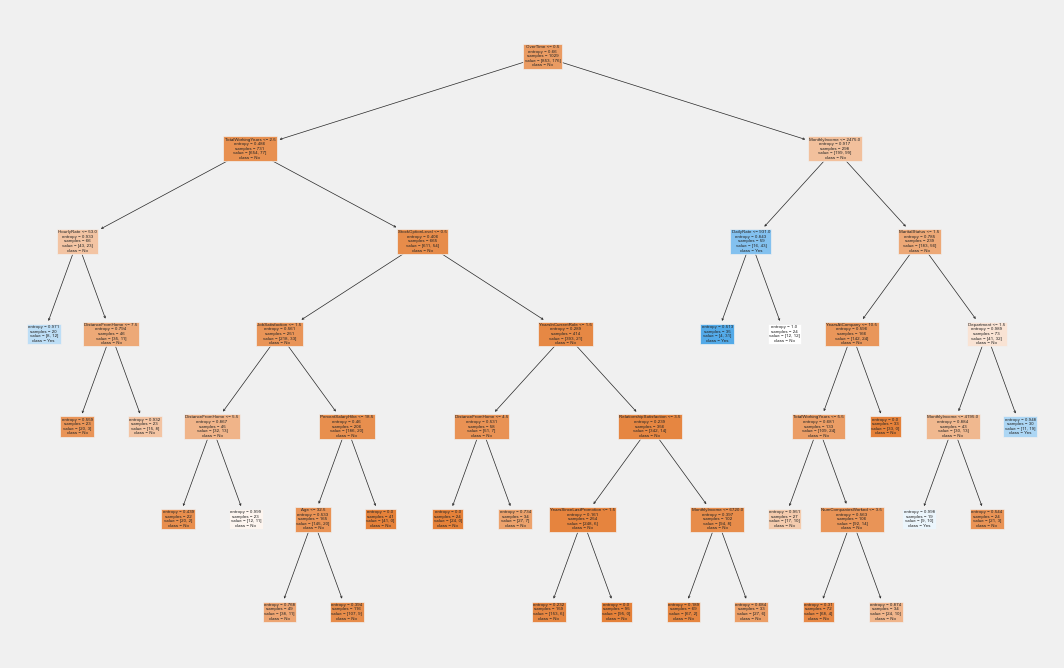

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=features, class_names=["No", "Yes"], filled=True)
plt.show()


# Random Forest 

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.876457   0.666667  0.870748    0.771562      0.847438
recall       0.989474   0.131148  0.870748    0.560311      0.870748
f1-score     0.929543   0.219178  0.870748    0.574360      0.831284
support    380.000000  61.000000  0.870748  441.000000    441.000000
_______________________________________________
Conf

# Random forest with hyperparameters

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
325 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_

Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873832   0.538462  0.863946    0.706147      0.827443
recall       0.984211   0.114754  0.863946    0.549482      0.863946
f1-score     0.925743   0.189189  0.863946

# Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize AdaBoost with a Decision Tree base learner
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train AdaBoost
ada_clf.fit(X_train, y_train)

# Predict on training & test sets
y_train_pred_ada = ada_clf.predict(X_train)
y_test_pred_ada = ada_clf.predict(X_test)

# Print performance
print("🔹 AdaBoost Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_ada):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_ada):.4f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_ada))


# Initialize AdaBoost with a Decision Tree base learner
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train AdaBoost
ada_clf.fit(X_train, y_train)

# Predict on training & test sets
y_train_pred_ada = ada_clf.predict(X_train)
y_test_pred_ada = ada_clf.predict(X_test)

# Print performance
print("🔹 AdaBoost Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_ada):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_ada):.4f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_ada))


🔹 AdaBoost Performance:
Train Accuracy: 0.9145
Test Accuracy: 0.8730

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.56      0.38      0.45        61

    accuracy                           0.87       441
   macro avg       0.73      0.66      0.69       441
weighted avg       0.86      0.87      0.86       441

🔹 AdaBoost Performance:
Train Accuracy: 0.9145
Test Accuracy: 0.8730

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.56      0.38      0.45        61

    accuracy                           0.87       441
   macro avg       0.73      0.66      0.69       441
weighted avg       0.86      0.87      0.86       441



# XGBoost

In [41]:
# Initialize XGBoost
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train XGBoost
xgb_clf.fit(X_train, y_train)

# Predict on training & test sets
y_train_pred_xgb = xgb_clf.predict(X_train)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Print performance
print("\n🔹 XGBoost Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_xgb))



🔹 XGBoost Performance:
Train Accuracy: 0.9475
Test Accuracy: 0.8753

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.62      0.26      0.37        61

    accuracy                           0.88       441
   macro avg       0.75      0.62      0.65       441
weighted avg       0.85      0.88      0.85       441



/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:30:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
